## Import the Libraries

## RFM Apprach -- > Recency,Frequency,Monetary Analysis --> Imp
## Cluster Model
## Unsupervised laerning Model

# Task:

#### 1. Data Cleaning and Exploratory Data Analysis
#### 2. Customer Segementation using RFM analysis
#### 3. Customer Segmentation using K-Means, Hierarchial and DBSCAN
#### 4. Analysis of customer retention using Cohort Analysis 

In [9]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split 

In [10]:
df = pd.read_csv("C:\\Users\\digit\\OneDrive\\Desktop\\ecommerce\\E-com_Data.csv")

In [11]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


### Task 1: Data Cleaning and EDA

##### a. Identifying missing values and noise in the dataset.
##### b. Cleaning and visualizing the data
##### c. Conducting analyses by invoice, product, other varible

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


## CustormerID -- Mandatory
## InvoiceNo. -- Frequency
## Date of Purchase -- Recency
## Price -- Monetory

## Item code --> tell about product though not needed for the FRM analysis.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [17]:
drop_columns= ["Item Code",'Quantity',
       'Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set']

In [18]:
df.drop(drop_columns, axis=1, inplace=True)

In [19]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [20]:
df.duplicated().sum()

6008

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
df.Price.min()  # return item.

-10152.0

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,402859.0,2182.187224,1252.636483,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535107.0,385009.702116,13418.210488,361429.0,372964.0,385665.0,396811.0,406651.0
Price,535107.0,2167.848915,4547.338495,-10152.0,453.0,1200.0,2236.0,90400.0


In [25]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values= pd.concat([missing_number,missing_percent], axis=1, keys= ["missing_number", "missing_percent"])
    return missing_values[missing_values["missing_number"]>0]

In [26]:
 missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


## In real life scenario, we ask for customer id or other data from which customer id can be extracted from the stakeholder.
## here, we will drop the rows containing null values.

In [28]:
df = df.dropna(subset= ["CustomerID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [29]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

CustomerID          0.0
InvoieNo            0.0
Date of purchase    0.0
Price               0.0
dtype: float64

In [30]:
import datetime

df["Date of purchase"] = pd.to_datetime(df["Date of purchase"])

In [31]:
df = df.rename(columns={"InvoieNo": "InvoiceNo", "Date of purchase": "Date"})

In [32]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [33]:
df["Date"].describe().T

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [34]:
df["CustomerID"].nunique()

4349

In [35]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

# Customer Segmentation using RFM Analysis

## RFM Analysis: is a marketing techniques and method used to evaluate customer behaviour.
##### RFM stands for Recency, Frequency and Monetary

- **Recency:** Indiactes how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.
- **Frequency:** Represents how many times a customer has made a purchase within a specific time period(typically a year). Customer who purchase more frequenctly have a higher frequency score.
- **Monetary:** Refers to the total amount a customer has spent within a specific time period. Customer who spend more have higher monetary score.


- A score of **5** represnt the best customer (most recent, most frequent and highest spending).
- A score of **1** represent the least engaged customers.


- **VIP customers**
- **Loyal customers**
- **Potential customer**
 

In [39]:
RFMApproach = df.groupby("CustomerID").agg({"Date": lambda x: (new_date-x.max()).days,
                                            "InvoiceNo": lambda x : x.count(),
                                            "Price": lambda x: x.sum()})

RFMApproach.rename(columns= {"Date" :"Recency", "InvoiceNo": "Frequnecy", "Price": "Monetary"},inplace= True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequnecy,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [40]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequnecy,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [41]:
## Splilt the data into 4 segment basis quantile method

quantiles = RFMApproach.quantile(q= [0.25,0.50,0.75])
qunatiles = quantiles.to_dict()
quantiles

,Recency,Frequnecy,Monetary
0.25,18.0,17.0,38140.0
0.50,51.0,42.0,83635.0
0.75,144.0,101.0,205444.0


### recency: 0.25 is best; most recent
### frequency: 100 percentile best --> most frequency
### monetary: 100 percentile best --> most frequency.

In [43]:
def recency_value(x,p,d):  # x --> customer, p--> percentile, d --> days
    if x<=d[p][0.25]:
        return 1  #  belongs to category 1
    elif x <= d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [44]:
def freq_Mont_value(x,p,d):
    if x< d[p][0.25]:
        return 4
    elif x<= d[p][0.5]: 
        return 3
    elif x <= d[p][0.75]:
        return 2

    else:
        return 1
        

In [45]:
RFMApproach["R"] = RFMApproach["Recency"].apply(recency_value, args=("Recency", quantiles))
RFMApproach["F"] = RFMApproach["Frequnecy"].apply(freq_Mont_value, args=("Frequnecy", quantiles))
RFMApproach["M"] = RFMApproach["Monetary"].apply(freq_Mont_value, args=("Monetary", quantiles))


In [46]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequnecy,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [47]:
RFMApproach["RFM"] = RFMApproach[['R','F','M']].sum(axis=1)

In [48]:
RFMApproach

,Recency,Frequnecy,Monetary,R,F,M,RFM
CustomerID,,,,,,,
2.0,4,181,550416.0,1,1,1,3
3.0,77,27,257404.0,3,3,1,7
4.0,19,72,176613.0,2,2,2,6
5.0,311,16,41976.0,4,4,3,11
6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12
4369.0,181,7,10774.0,4,4,4,12
4370.0,9,13,24962.0,1,4,4,9


## RFM : min: 3 best; max -- 12 worst.

In [50]:
RFMApproach['RFM'].value_counts()

RFM
10    509
3     471
7     466
9     461
8     448
5     439
6     408
12    396
11    381
4     370
Name: count, dtype: int64

In [51]:
## Simplify the process: 

Loyality_level = ['Platinum', 'Gold', 'Sliver', 'Bronze' ]

score_cuts= pd.qcut(RFMApproach.RFM, q=4, labels= Loyality_level)
RFMApproach['Loyality_level'] = score_cuts.values
RFMApproach




,Recency,Frequnecy,Monetary,R,F,M,RFM,Loyality_level
CustomerID,,,,,,,,
2.0,4,181,550416.0,1,1,1,3,Platinum
3.0,77,27,257404.0,3,3,1,7,Gold
4.0,19,72,176613.0,2,2,2,6,Gold
5.0,311,16,41976.0,4,4,3,11,Bronze
6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12,Bronze
4369.0,181,7,10774.0,4,4,4,12,Bronze
4370.0,9,13,24962.0,1,4,4,9,Sliver


In [52]:
RFMApproach= RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequnecy,Monetary,R,F,M,RFM,Loyality_level
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Sliver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


In [53]:
RFMApproach['Loyality_level'].value_counts()

Loyality_level
Gold        1322
Platinum    1280
Sliver       970
Bronze       777
Name: count, dtype: int64

In [54]:
RFMApproach.to_csv("RFMApproach.csv")

In [55]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequnecy', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [56]:
final_report = RFMApproach.groupby('Loyality_level')[['CustomerID', 'Recency', 'Frequnecy', 'Monetary']].agg({'Recency': 'sum',
                                                                                                              'Frequnecy': 'sum',
                                                                                                              'Monetary': 'sum',
                                                                                                              'CustomerID': 'nunique'}).reset_index()


In [57]:
final_report

,Loyality_level,Recency,Frequnecy,Monetary,CustomerID
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84405,76067,166521241.0,1322
2,Sliver,123730,23799,50244861.1,970
3,Bronze,171653,8364,17991780.0,777


In [58]:
final_report = final_report.rename(columns= {'CustomerID': "NumBuyers"})
final_report

,Loyality_level,Recency,Frequnecy,Monetary,NumBuyers
0,Platinum,25971,294629,763311232.0,1280
1,Gold,84405,76067,166521241.0,1322
2,Sliver,123730,23799,50244861.1,970
3,Bronze,171653,8364,17991780.0,777


In [59]:
final_report['Percent'] = round(final_report['NumBuyers']/final_report['NumBuyers'].sum()*100,2)
final_report

,Loyality_level,Recency,Frequnecy,Monetary,NumBuyers,Percent
0,Platinum,25971,294629,763311232.0,1280,29.43
1,Gold,84405,76067,166521241.0,1322,30.40
2,Sliver,123730,23799,50244861.1,970,22.30
3,Bronze,171653,8364,17991780.0,777,17.87


In [60]:
final_report_1 = final_report[['Loyality_level', 'NumBuyers', "Percent"]]
final_report_1

,Loyality_level,NumBuyers,Percent
0,Platinum,1280,29.43
1,Gold,1322,30.40
2,Sliver,970,22.30
3,Bronze,777,17.87


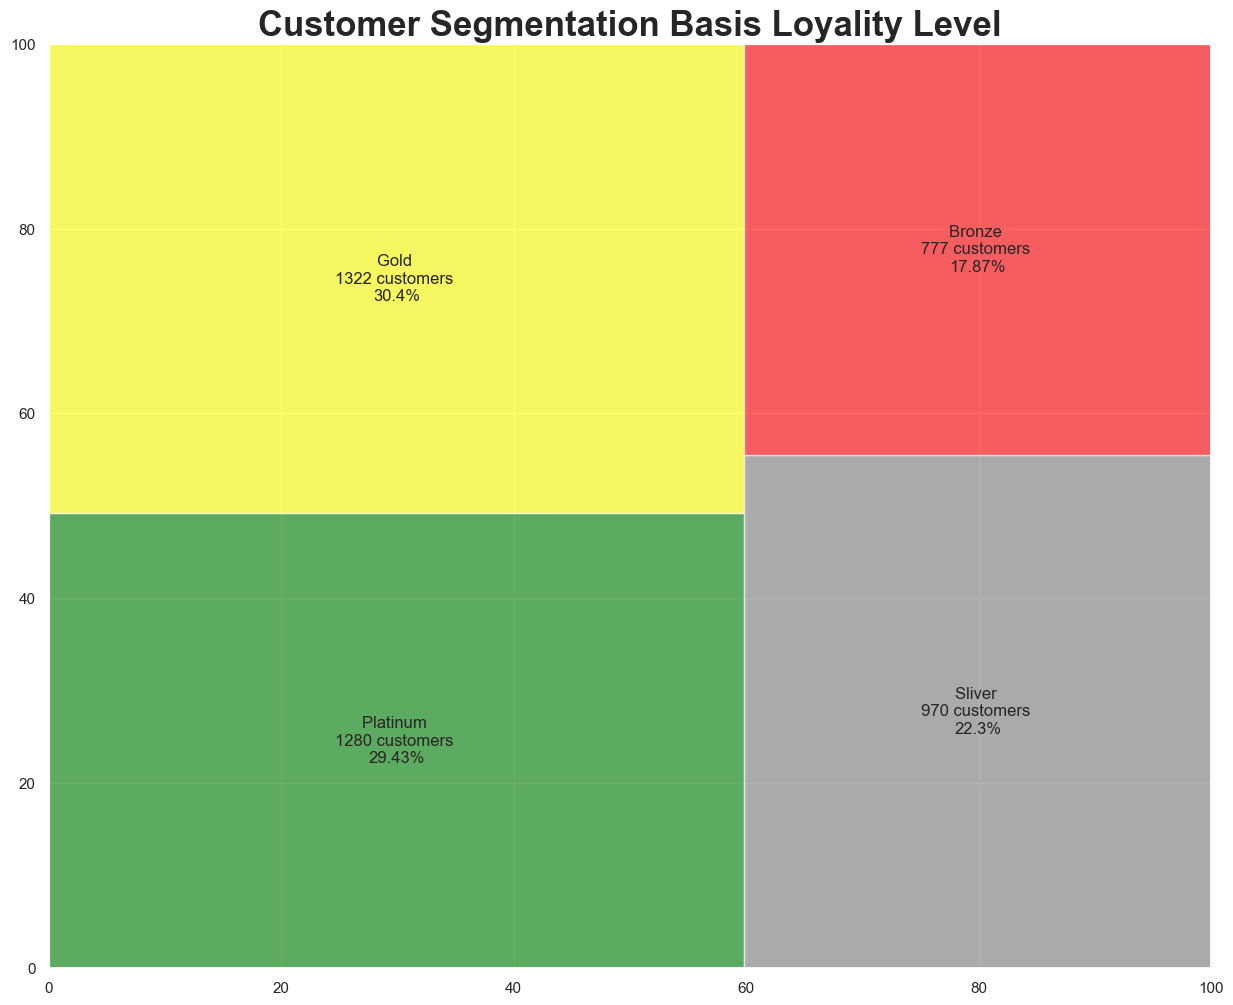

In [61]:
import squarify
fig = plt.gcf()
ax= fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics= {'Platinum':'green', 'Gold': 'yellow', 'Silver': 'gray', "Bronze": 'red'}

squarify.plot(sizes= final_report_1['NumBuyers'], color= colors_dics.values(),
             label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report_1.iloc[i]) for i in range(0, len(final_report_1))], alpha= 0.6)

plt.title("Customer Segmentation Basis Loyality Level", fontsize= 25, fontweight= 'bold')
plt.show()


## Unsupervised Machine Learning -- Segmentation/Clustering/Grouping

# K- Means Cluster

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [128]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequnecy', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [136]:
rfm_df = RFMApproach[['Recency', 'Frequnecy', 'Monetary']]

In [138]:
rfm_df.head()

,Recency,Frequnecy,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


## Standarization 



In [144]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

## Part 1 -- Customer Segmentation( KMeans)
#### Finding optimal clusters using Elbow Method

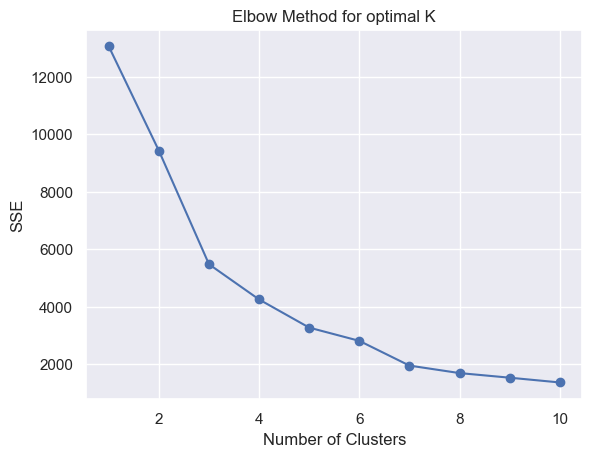

In [156]:
sse = []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for optimal K")
plt.show()

In [158]:
kmeans= KMeans(n_clusters=5, random_state=42)
rfm_df["KMeans_cluster"] = kmeans.fit_predict(rfm_scaled)

In [160]:
rfm_df

,Recency,Frequnecy,Monetary,KMeans_cluster
0,4,181,550416.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,1
4,37,84,151822.0,0
...,...,...,...,...
4344,278,10,20480.0,1
4345,181,7,10774.0,1
4346,9,13,24962.0,0
4347,4,751,279720.0,4


In [162]:
rfm_df["KMeans_cluster"].value_counts()

KMeans_cluster
0    2920
1    1063
4     351
3      11
2       4
Name: count, dtype: int64

## Hierarchial Cluster

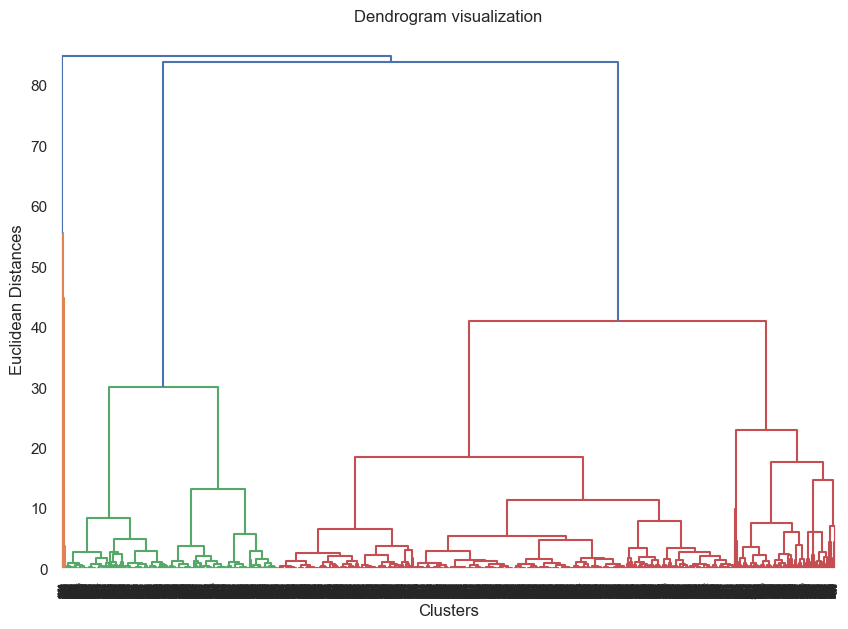

In [169]:
linked = linkage(rfm_scaled, method= "ward")
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("Dendrogram visualization")
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distances")
plt.show()

In [171]:
rfm_df["Hierarchial_Clusters"] = fcluster(linked,6, criterion= "maxclust")
rfm_df

,Recency,Frequnecy,Monetary,KMeans_cluster,Hierarchial_Clusters
0,4,181,550416.0,0,6
1,77,27,257404.0,0,5
2,19,72,176613.0,0,5
3,311,16,41976.0,1,4
4,37,84,151822.0,0,5
...,...,...,...,...,...
4344,278,10,20480.0,1,4
4345,181,7,10774.0,1,4
4346,9,13,24962.0,0,5
4347,4,751,279720.0,4,6


In [175]:
rfm_df["Hierarchial_Clusters"].value_counts(normalize= True)

Hierarchial_Clusters
5    0.589561
4    0.275236
6    0.130145
2    0.003909
1    0.000920
3    0.000230
Name: proportion, dtype: float64

## Part 3 DBSCAN

In [183]:
dbscan = DBSCAN(eps= 1.5, min_samples=5)
rfm_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
rfm_df

,Recency,Frequnecy,Monetary,KMeans_cluster,Hierarchial_Clusters,DBSCAN_Cluster
0,4,181,550416.0,0,6,0
1,77,27,257404.0,0,5,0
2,19,72,176613.0,0,5,0
3,311,16,41976.0,1,4,0
4,37,84,151822.0,0,5,0
...,...,...,...,...,...,...
4344,278,10,20480.0,1,4,0
4345,181,7,10774.0,1,4,0
4346,9,13,24962.0,0,5,0
4347,4,751,279720.0,4,6,0


In [185]:
rfm_df['DBSCAN_Cluster'].value_counts()  # -1: noise data -- drop it.

DBSCAN_Cluster
 0    4330
-1      19
Name: count, dtype: int64

## Cohort Analysis for Customer Retention
##### How many customers keep coming back -- group them.

In [189]:
## original dataset
df = pd.read_csv("C:\\Users\\digit\\OneDrive\\Desktop\\ecommerce\\E-com_Data.csv")

In [195]:
df.drop_duplicates(inplace= True)

In [197]:
df.duplicated().sum()

0

In [199]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [201]:
df['Date'] = pd.to_datetime(df["Date of purchase"])
df["Month"] = df["Date"].dt.to_period("M")
df["CohortMonth"] = df.groupby("CustomerID")["Date"].transform('min').dt.to_period('M')

In [203]:
df

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date,Month,CohortMonth
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017-10,2017-09
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05,2017-10,2017-02
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12,2017-10,2017-02
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22,2017-08,2017-02
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10,2017-10,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537975,NaN,14693,367605.0,06-02-2017,2.0,2:25:00 PM,761.0,1522.0,Location 8,NaN,NaN,NaN,2017-02-06,2017-02,NaT
537976,NaN,14693,368246.0,06-02-2017,3.0,10:40:00 AM,761.0,2283.0,Location 8,NaN,NaN,NaN,2017-02-06,2017-02,NaT
537977,NaN,85194L,366891.0,29-01-2017,15.0,5:05:00 PM,198.0,2970.0,Location 8,NaN,NaN,NaN,2017-01-29,2017-01,NaT
537978,NaN,14693,391243.0,17-09-2017,20.0,12:42:00 PM,417.0,8340.0,Location 8,NaN,NaN,NaN,2017-09-17,2017-09,NaT


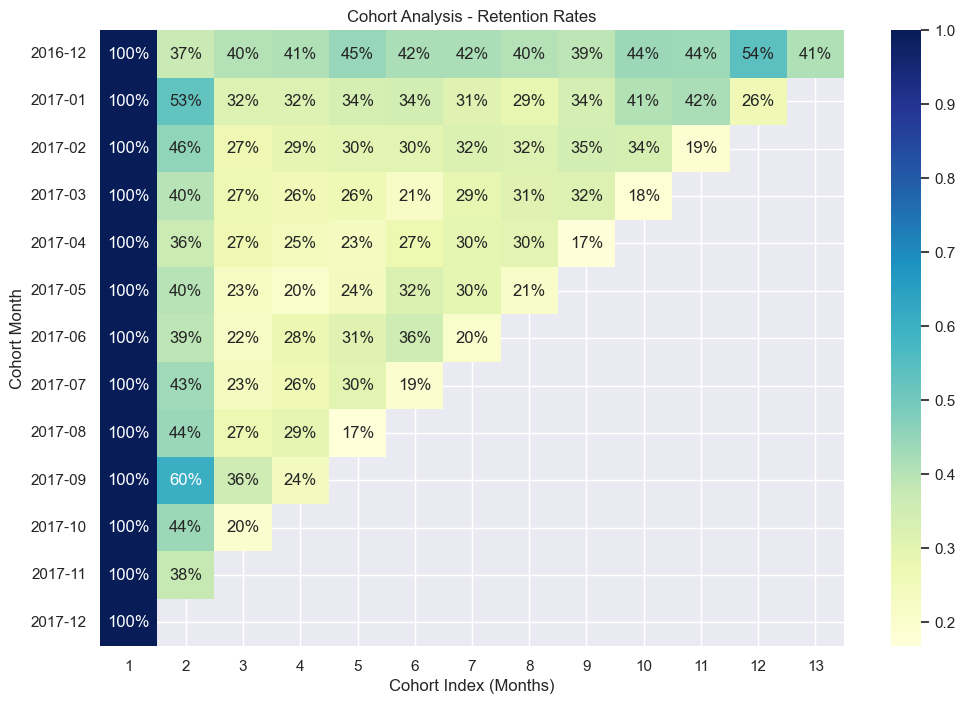

In [209]:
def cohort_index(df):
    year_diff = df['Month'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['Month'].dt.month - df['CohortMonth'].dt.month
    return year_diff*12 + month_diff +1

df["CohortIndex"] = cohort_index(df)

cohort_data = df.groupby(["CohortMonth","CohortIndex"])["CustomerID"].nunique().reset_index()

cohort_counts = cohort_data.pivot_table(index= "CohortMonth", columns= "CohortIndex", values= "CustomerID")

## Retention Rate

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize= (12,8))
sns.heatmap(retention, annot= True, fmt= '.0%', cmap= 'YlGnBu')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months)')
plt.show()

In [207]:
df

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date,Month,CohortMonth,CohortIndex
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017-10,2017-09,2
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05,2017-10,2017-02,9
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12,2017-10,2017-02,9
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22,2017-08,2017-02,7
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10,2017-10,2017-02,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537975,NaN,14693,367605.0,06-02-2017,2.0,2:25:00 PM,761.0,1522.0,Location 8,NaN,NaN,NaN,2017-02-06,2017-02,NaT,24220
537976,NaN,14693,368246.0,06-02-2017,3.0,10:40:00 AM,761.0,2283.0,Location 8,NaN,NaN,NaN,2017-02-06,2017-02,NaT,24220
537977,NaN,85194L,366891.0,29-01-2017,15.0,5:05:00 PM,198.0,2970.0,Location 8,NaN,NaN,NaN,2017-01-29,2017-01,NaT,24219
537978,NaN,14693,391243.0,17-09-2017,20.0,12:42:00 PM,417.0,8340.0,Location 8,NaN,NaN,NaN,2017-09-17,2017-09,NaT,24227
